# Détectin des Risques de Churn Client avec un Modele de Classification Supervisée

#### Projet par groupe

### Membre du groupe:
#### * AMKHIB Fatima-Zohra
#### * BENALLAL MEGHOGHI Mohamed Amine
#### * KHERIBI Nour
#### * WAHABI Wissal

# Exploration du Data

In [2]:
import pandas as pd

In [3]:
df= pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Nettoyage du Data

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### ==> Cette etape montre qu'il n'y a pas des valeurs manquante

In [5]:
df.duplicated().sum()

0

#### ==> Pas de valeurs dupliquees 

In [6]:
import matplotlib.pyplot as plt

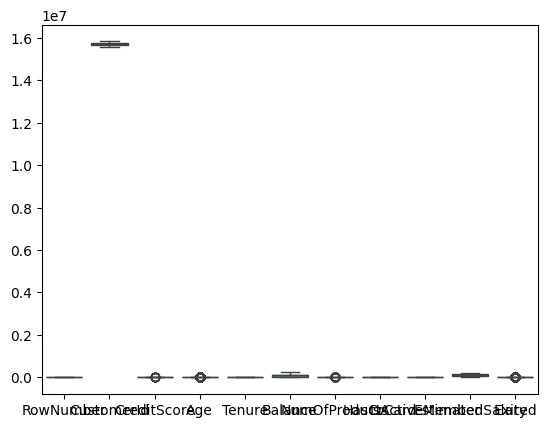

In [7]:
import seaborn as sns
sns.boxplot(df)
plt.show()

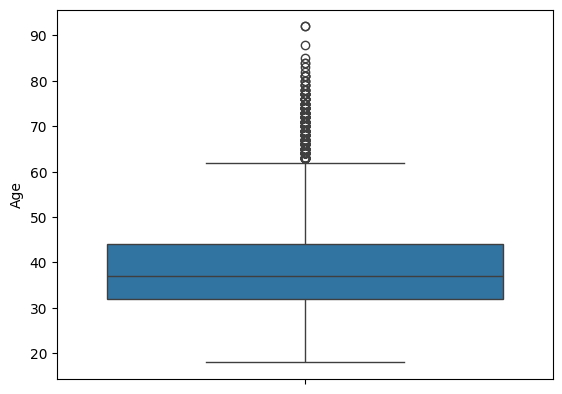

In [8]:
sns.boxplot(df['Age'])
plt.show()

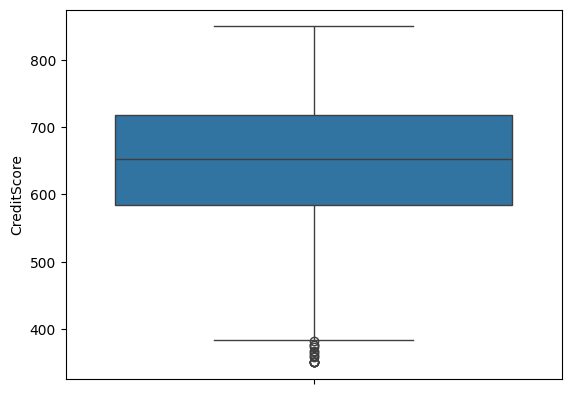

In [9]:
sns.boxplot(df['CreditScore'])
plt.show()

In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### ==> il y a des outliers dans la colonne 'Age' et 'CreditScore' mais c'est logique

In [11]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

# Suppression des variables inutile

In [12]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [13]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Visualilation du Data

## distribuation du geography

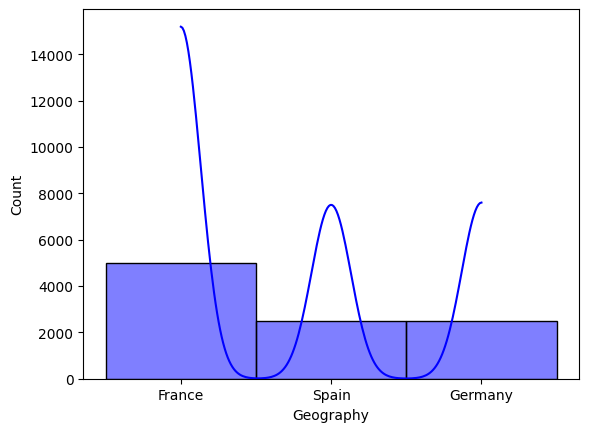

In [14]:
sns.histplot(df['Geography'], bins=5, kde=True, color='blue')
plt.show()


## Distribution du genre

In [15]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

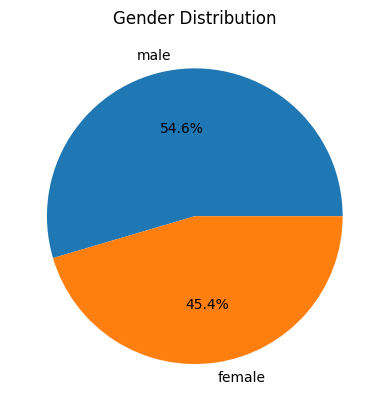

In [16]:
gender = ['male', 'female']
x = [5457, 4543]

plt.pie(x, labels = gender, autopct = '%1.1f%%')
plt.title('Gender Distribution')
plt.show()

## Distribution des variables numeriques

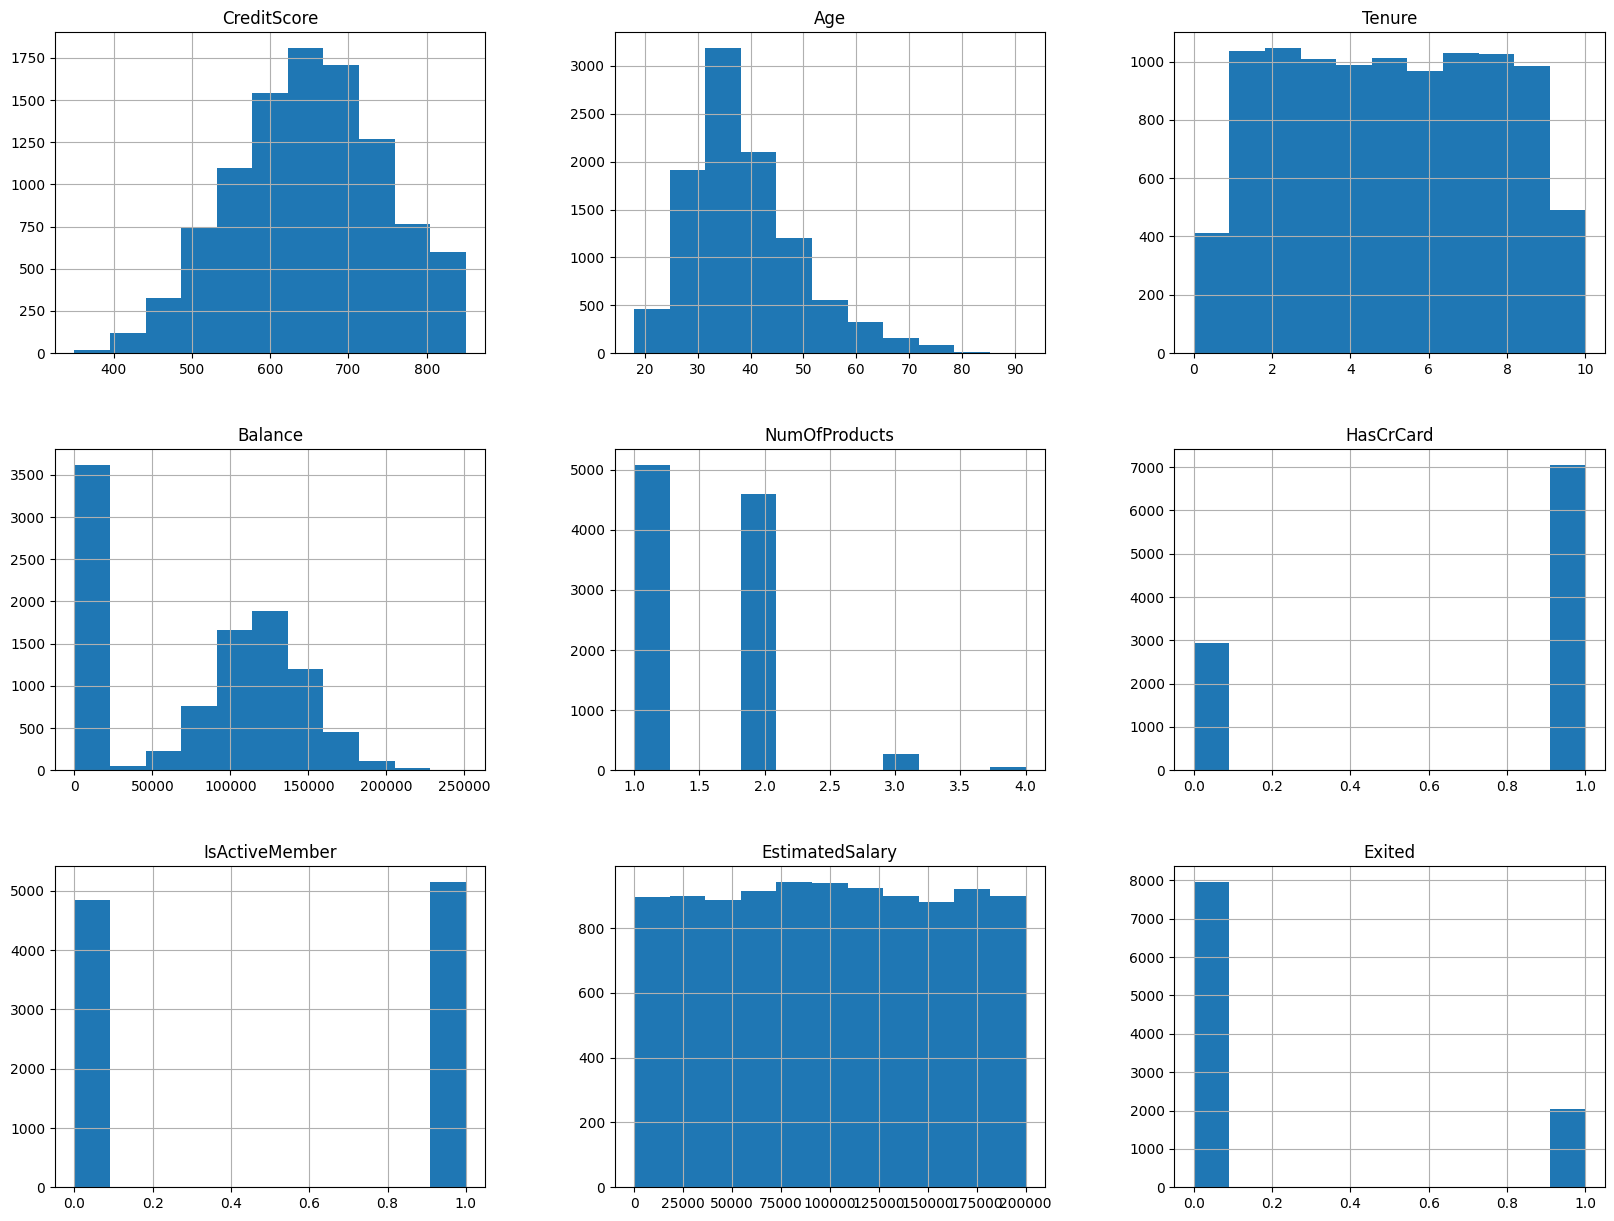

In [17]:
df.hist(bins=11, figsize=(20,15))
plt.show()

In [18]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Distribution du variable cible

In [19]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

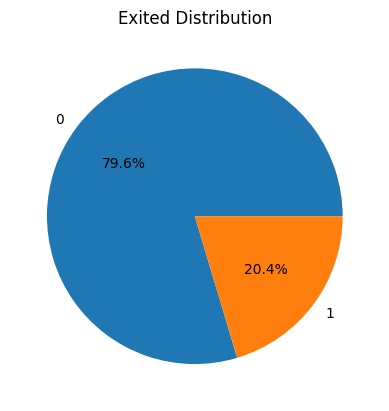

In [20]:
Exited = [0, 1]
x = [7963, 2037]

plt.pie(x, labels = Exited, autopct = '%1.1f%%')
plt.title('Exited Distribution')
plt.show()

#### ==> On peut remarquer que la dataset n'est pas équilibrer

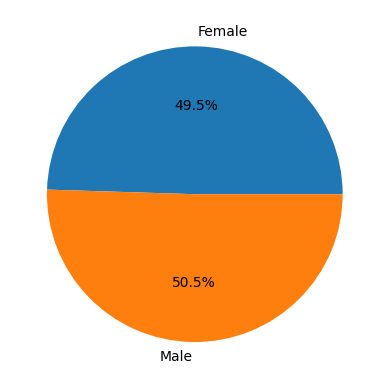

In [21]:
d = df.groupby('Gender')['Balance'].mean()
x = d.values
y = d.index

plt.pie(x, labels = y, autopct='%1.1f%%')
plt.show()

In [22]:
f = df.groupby('Geography')['Gender'].value_counts()
f


Geography  Gender
France     Male      2753
           Female    2261
Germany    Male      1316
           Female    1193
Spain      Male      1388
           Female    1089
Name: count, dtype: int64

# Encodage des colonnes categorielles

In [23]:
from sklearn.preprocessing import LabelEncoder

df['Gender']=LabelEncoder().fit_transform(df['Gender'])
df['Geography']=LabelEncoder().fit_transform(df['Geography'])

In [24]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [25]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

## Visualisation de la relation entre les caractéristiques et la colonne cible

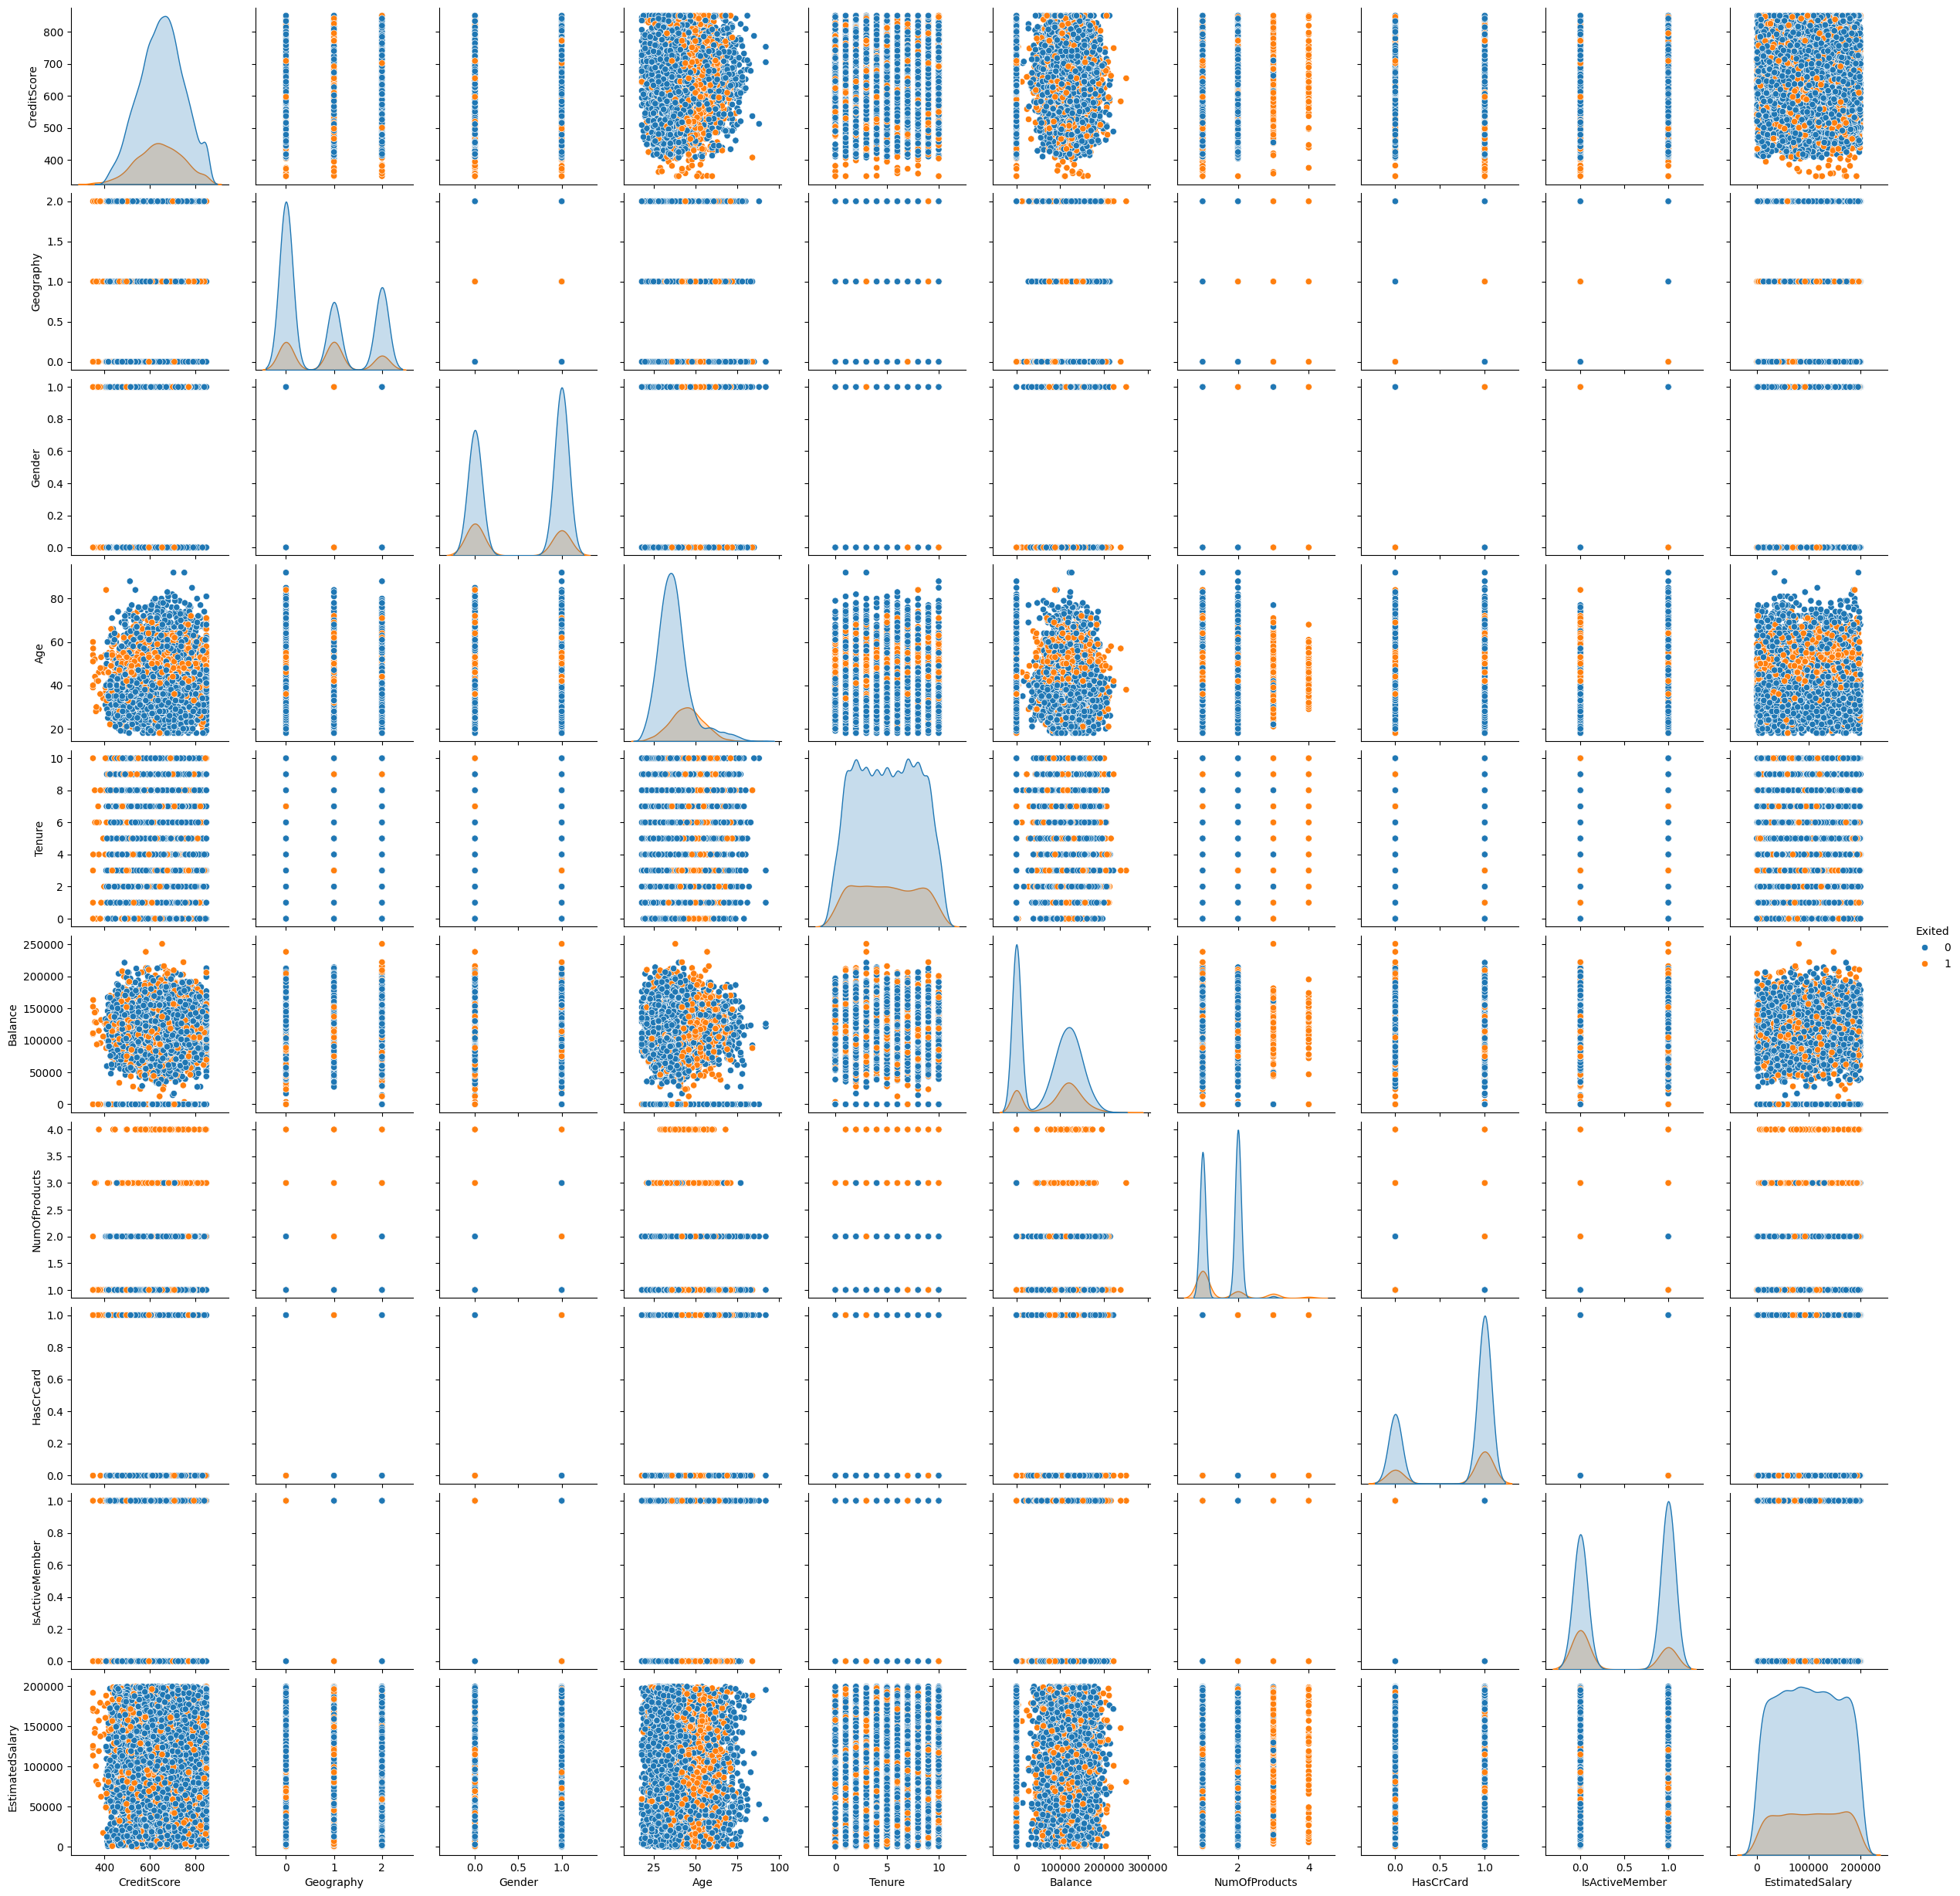

In [26]:
sns.pairplot(df, hue='Exited')
plt.show()

# Séparer data en X et Y

In [27]:
x= df.drop(columns='Exited')
y= df['Exited']

In [28]:
x.shape

(10000, 10)

# Normalisation des données

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x= scaler.fit_transform(x)

# Equlibrage du Dataset

In [30]:
# pip install imblearn

In [31]:
from imblearn.combine import SMOTEENN

smote = SMOTEENN()
X_res, y_res = smote.fit_resample(x, y)

In [32]:
X_res

array([[ 0.50152063, -0.90188624, -1.09598752, ..., -1.54776799,
        -1.03067011, -0.10891792],
       [ 1.77417405, -0.90188624,  0.91241915, ...,  0.64609167,
         0.97024255, -1.56548722],
       [ 0.346319  , -0.90188624,  0.91241915, ...,  0.64609167,
         0.97024255, -0.49323048],
       ...,
       [ 1.00474581,  0.30659057, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.32690732],
       [-1.32782549,  0.30659057,  0.91241915, ...,  0.64609167,
         0.97024255, -0.71560339],
       [ 1.89744938,  0.30659057, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.08293262]])

# Diviser en train/test

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Logistique regression

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [35]:
y_pred= model.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision= precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

Accuracy: 0.7705592105263158
Precision: 0.7692411966290775


#### ==> L'accuracy est un petit peut faible 

## Cross validation 

In [37]:
from sklearn.model_selection import cross_val_score, KFold
kf= KFold(n_splits=5, shuffle=True, random_state=42)
scores= cross_val_score(model,x,y,cv=kf)
print(f"scores de validation croisee: {scores}")
print(f"score moyen: {scores.mean(): 2f}")

scores de validation croisee: [0.8155 0.805  0.798  0.809  0.813 ]
score moyen:  0.808100


#### ==> On utilisons la cross validation l'accuracy augmente à 80%

## Matrice de confusion

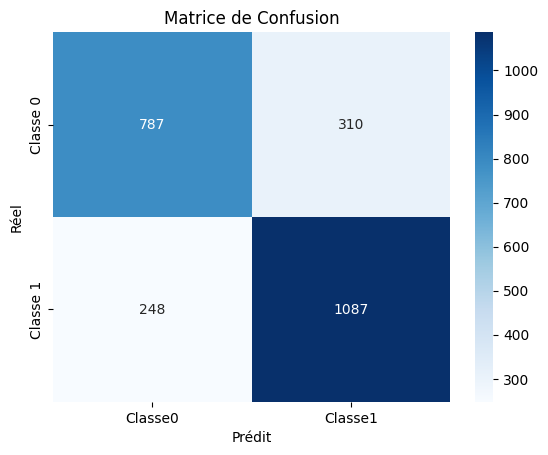

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe0', 'Classe1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

## ROC-AUC

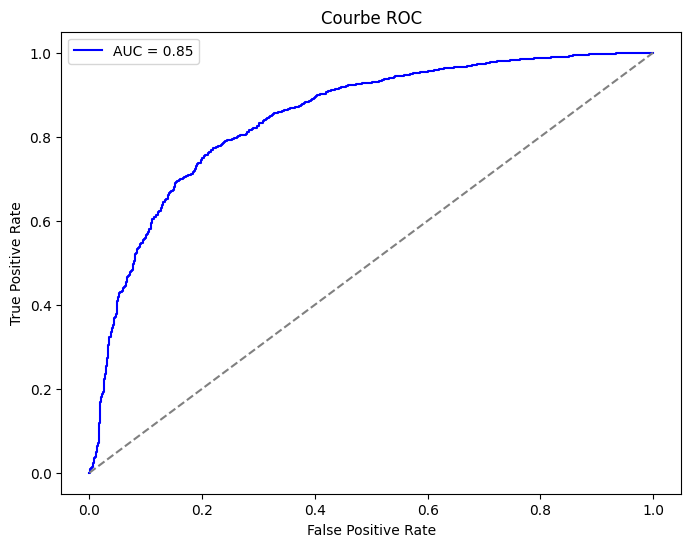

In [39]:
from sklearn.metrics import roc_curve, auc


# Calcul de la courbe ROC
y_scores = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

# KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
y_pred_knn= knn.predict(x_test)

In [42]:
accuracy_knn= accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.96875

#### ==> L'accuracy avec KNN est à propos de 98%, c-a-d que le model a bien s'entrainer

## Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score, KFold
kf= KFold(n_splits=5, shuffle=True, random_state=42)
scores= cross_val_score(knn,x,y,cv=kf)
print(f"scores de validation croisee: {scores}")
print(f"score moyen: {scores.mean(): 2f}")

scores de validation croisee: [0.8365 0.8215 0.8215 0.828  0.824 ]
score moyen:  0.826300


## Matrice de Confusion

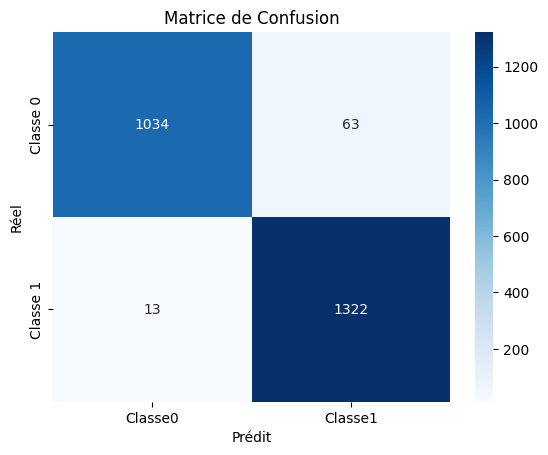

In [44]:
confu_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(confu_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe0', 'Classe1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

#### ==> La matrice de confusion nous montre que le model fait la majorité des prédiction juste

## ROC-AUC

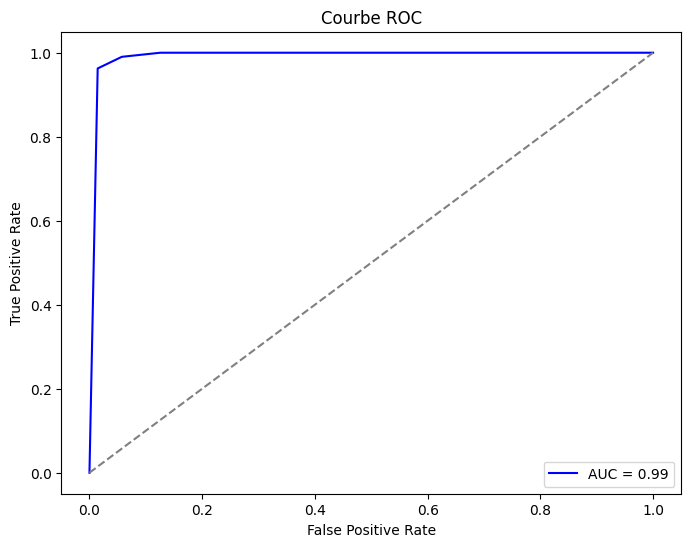

In [45]:
# Calcul de la courbe ROC
y_scores = knn.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

### ==> Cette courbe ROC montre que la marge d'erreur est tros faible dans ce model 

# Decision tree

In [46]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
tree.fit(x_train, y_train)

print("Modèle d'Arbre de Décision entraîné avec succès.")

Modèle d'Arbre de Décision entraîné avec succès.


In [47]:
y_pred_tree= tree.predict(x_test)
accuracy_TREE= accuracy_score(y_test, y_pred_tree)
print("Laccuracy de l'arbre de decision est", accuracy_TREE)

Laccuracy de l'arbre de decision est 0.8149671052631579


#### ==> On utilisons 'Decision tree', l'accurcy est de 80% (moins que KNN)

## Cross de Validation

In [48]:
from sklearn.model_selection import cross_val_score, KFold
kf= KFold(n_splits=5, shuffle=True, random_state=42)
scores= cross_val_score(tree,x,y,cv=kf)
print(f"scores de validation croisee: {scores}")
print(f"score moyen: {scores.mean(): 2f}")

scores de validation croisee: [0.8485 0.8365 0.8315 0.8465 0.84  ]
score moyen:  0.840600


## Matrice de Confusion

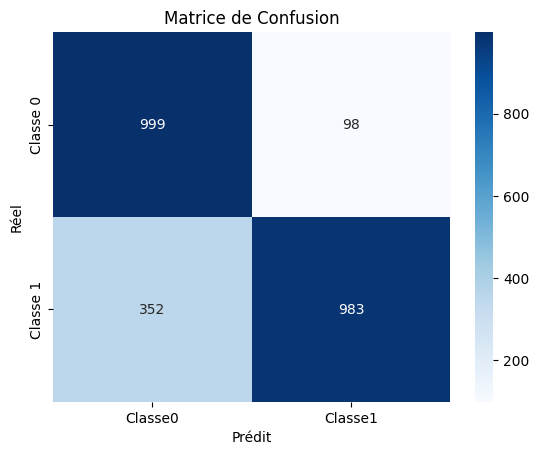

In [49]:
confus_matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(confus_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe0', 'Classe1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

#### ==> Cette matrice de confusion nous montre que le model fait des fauttes pour prédire la classe 1

## Visualisation de l'arbre de decision 

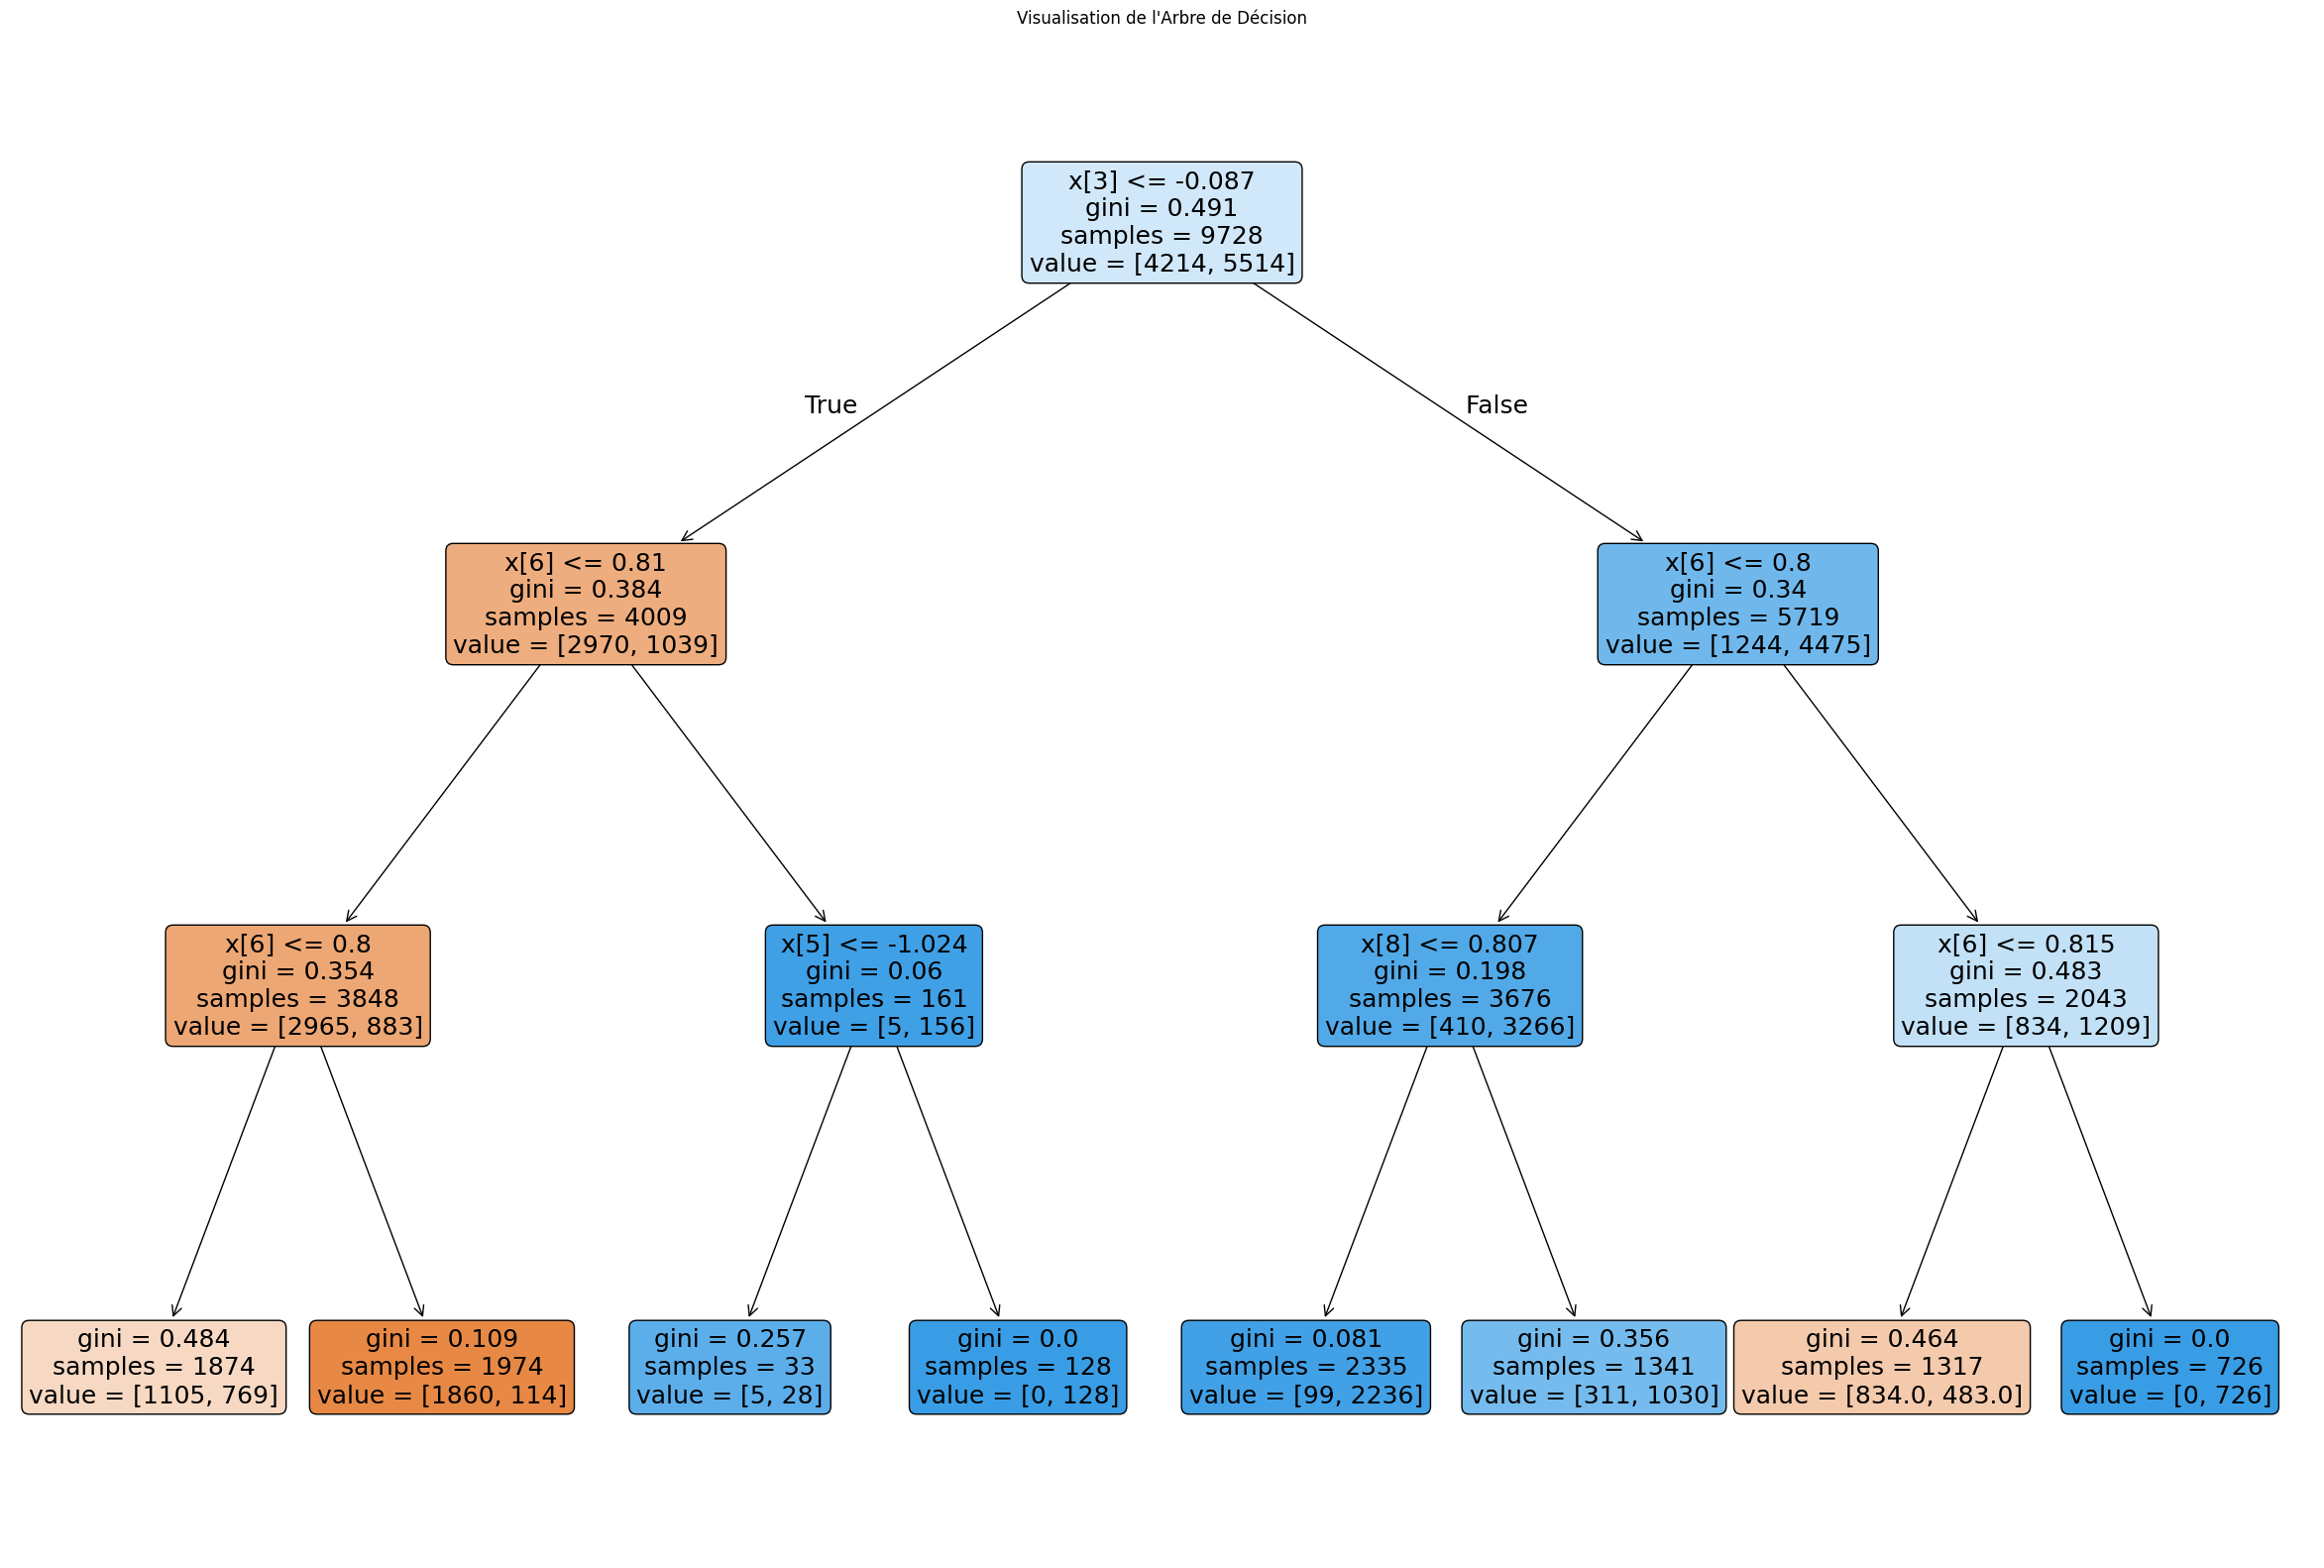

In [50]:
plt.figure(figsize=(30, 20))
plot_tree(
    tree,
    filled=True,
    rounded=True,
    fontsize=18
)
plt.title("Visualisation de l'Arbre de Décision")
plt.show()

## ROC-AUC

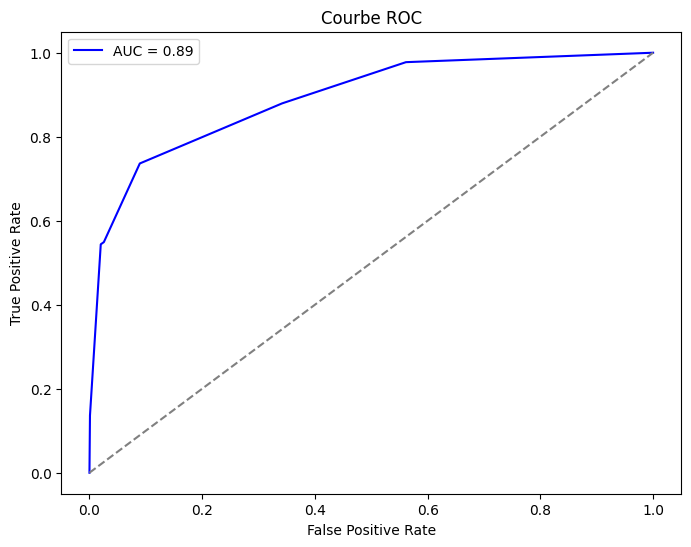

In [51]:
# Calcul de la courbe ROC
y_scores = tree.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

# SVM

In [52]:
from sklearn.svm import SVC

svc_model = SVC(kernel='rbf') 
svc_model.fit(x_train, y_train)

SVC()

In [53]:
y_pred_svc = svc_model.predict(x_test)


In [54]:
accuracy_svc= accuracy_score(y_test, y_pred_svc)
accuracy_svc

0.9054276315789473

#### ==> Avec 'SVM', l'accuracy est 91% mais KNN reste mieux

## Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score, KFold
kf= KFold(n_splits=5, shuffle=True, random_state=42)
scores= cross_val_score(svc_model,x,y,cv=kf)
print(f"scores de validation croisee: {scores}")
print(f"score moyen: {scores.mean(): 2f}")

scores de validation croisee: [0.8575 0.8605 0.8475 0.8635 0.8545]
score moyen:  0.856700


## Matrice de confusion

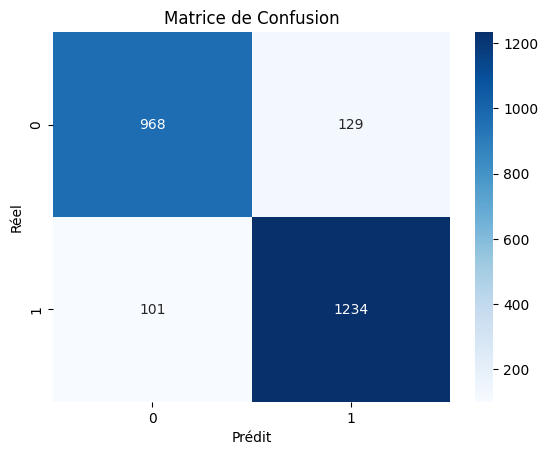

In [56]:
confusi_matrix = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(confusi_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

#### ==> La matrice de confusion de 'SVM', montre que le model prédit malle la classe 0

In [57]:
# # Calcul de la courbe ROC
# y_scores = svc_model.predict_proba(x_test)[:, 1]
# fpr, tpr, _ = roc_curve(y_test, y_scores)
# roc_auc = auc(fpr, tpr)

# # Affichage de la courbe ROC
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Courbe ROC')
# plt.legend()
# plt.show()

# Random forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [60]:
y_predr = rf.predict(x_test)
accuracyr = accuracy_score(y_test, y_predr)
print(f'Accuracy du model RF : {accuracyr: .2f}')

Accuracy du model RF :  0.95


#### ==> L'accuracy est proche à celle de KNN c-a-d le modele avec Random forest est aussi bien pour la prédiction

In [61]:
from sklearn.metrics import classification_report

In [62]:
print('Rapport de classification: ')
print(classification_report(y_test, y_predr, target_names=[str(cls) for cls in rf.classes_]))

Rapport de classification: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1097
           1       0.96      0.96      0.96      1335

    accuracy                           0.95      2432
   macro avg       0.95      0.95      0.95      2432
weighted avg       0.95      0.95      0.95      2432



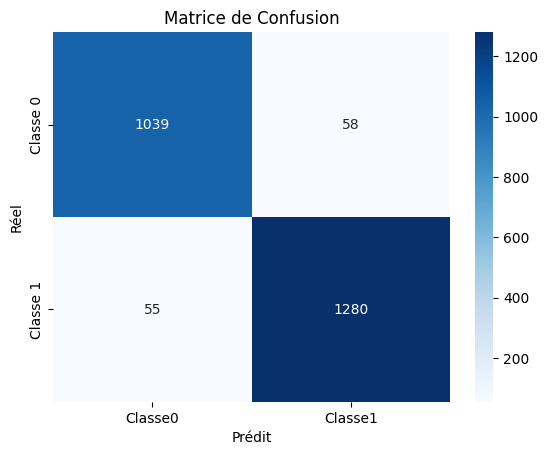

In [63]:
confusi_matrix = confusion_matrix(y_test, y_predr)
sns.heatmap(confusi_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe0', 'Classe1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

#### ==> La matrice de confusion est bonne pour une prédiction avec une marge d'erreur équilibrer entre les deux classes

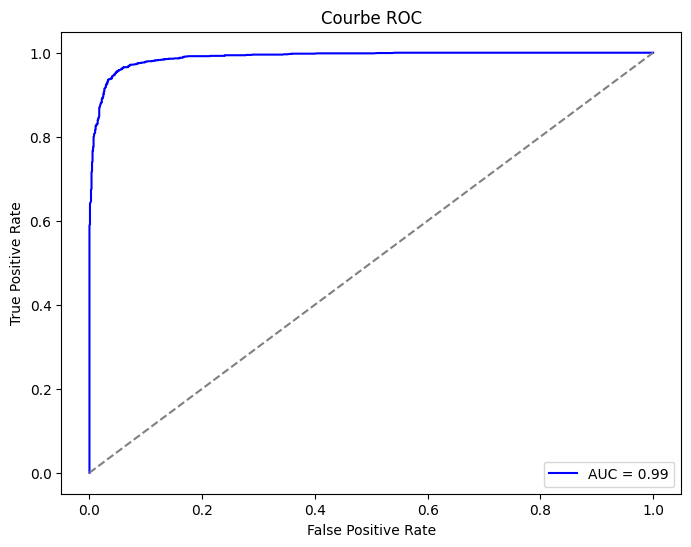

In [64]:
# Calcul de la courbe ROC
y_scores = rf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

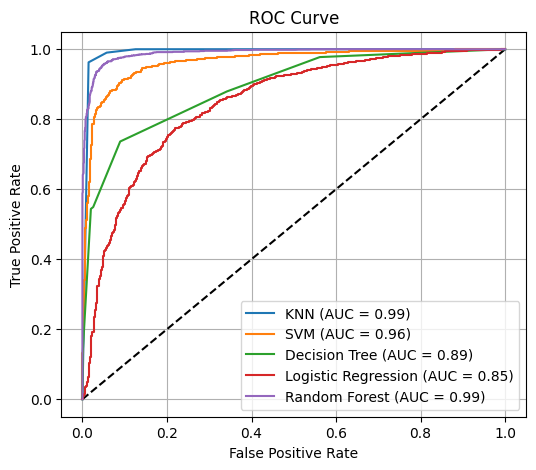

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc(model, x_test, y_test, title):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(x_test)[:, 1]
    else:
        y_prob = model.decision_function(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f'{title} (AUC = {auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

# Affichage ROC
plt.figure(figsize=(6, 5))
plt.plot([0, 1], [0, 1], "k--")
plot_roc(knn, x_test, y_test, "KNN")
plot_roc(svc_model, x_test, y_test, "SVM")
plot_roc(tree, x_test, y_test, "Decision Tree")
plot_roc(model, x_test, y_test, "Logistic Regression")
plot_roc(rf, x_test, y_test, "Random Forest")
plt.grid()
plt.show()

L'accuracy des modeles:

- Logistic regression: 77%
- Knn: 98%
- Decision tree: 84%
- SVM: 85%
- Random forest: 96%

### ==> On peut remarquer que les deux modeles (KNN, Random forest) sont proches au niveaux d'accuracy, mais on s'appuiant sur aussi sur la matrice de confusion, on décider que le model KNN est le plus précis

## Prediction

In [66]:
pred=knn.predict([[0.30, 0.04, 1.80, 0.8, 0.5, 1.35, 0.1, 1, 0, 0.66]])
pred

array([0])

#### ==> On a choisie le modele KNN comme le meilleur modele pour la prediction, car il a obtenu la meilleure precision (99%) et la meilleure accuracy (98%).

In [67]:
print('Rapport de classification: ')
print(classification_report(y_test, y_pred_knn, target_names=[str(cls) for cls in knn.classes_]))

Rapport de classification: 
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1097
           1       0.95      0.99      0.97      1335

    accuracy                           0.97      2432
   macro avg       0.97      0.97      0.97      2432
weighted avg       0.97      0.97      0.97      2432



# Enregistrement du meilleur model

In [69]:
import joblib
joblib.dump(knn, 'knn_churn2.pkl')

['knn_churn2.pkl']